In [1]:
#gettin dem packages
drive_path = 'e:/'

from IPython.display import HTML, display

import numpy as np
import math
import matplotlib.pyplot as plt

import scipy.misc
import scipy.ndimage
from scipy.ndimage.interpolation import zoom
from scipy.signal import convolve2d
from scipy import fftpack

from __future__ import print_function

import cv2
import radialProfile
import astropy

import skimage
from skimage.filters import gabor
from skimage.filters import gabor_kernel
from skimage import data, io


%matplotlib notebook
%matplotlib inline

In [4]:
# importing relevant allen institute stuffs
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import pprint
boc = BrainObservatoryCache(manifest_file="E:\BrainObservatory\manifest.json")

In [5]:
# retrieving natural images
boc.get_ophys_experiments(stimuli= ["natural_scenes"])[0]
data_set = boc.get_ophys_experiment_data(506278598)
natural_scenes = data_set.get_stimulus_template("natural_scenes")

(918L, 1174L)

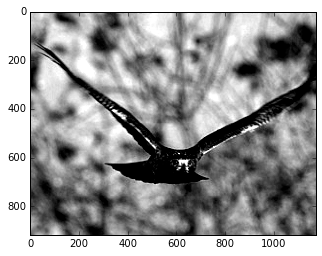

In [18]:
# show me one of dem natural scenes ya'll, how big dem scenes?
a_scene = natural_scenes[55,:,:] #this is a 3d array [x,y,z] x is the actual image index; y & z are the image as a 2d array
plt.imshow(a_scene,cmap= "gray")
a_scene.shape

In [27]:
def fouri_trans(image,plot=False): # compute dat fourier transform
    F1 = fftpack.fft2(image - np.mean(image[:])) # shift them quadrants around so dat low spatial frequencies are da center of da 2D fourier transformed image.
    F2 = fftpack.fftshift( F1 ) # Calculatin' a 2D power spectrum
    psd2D = np.abs( F2 )**2 # Calculate the azimuthally averaged 1D power spectrum
    psd1D = radialProfile.azimuthalAverage(psd2D, center =[459,587])
    #plottin dem results ya'll!
    img1 = np.log10(image + 1)
    img2 = np.log10(psd2D)
    img3 = psd1D
    if plot:
        plt.figure(1)
        plt.imshow(img1, cmap= "gray" ) #The +1 shifts it to non-zero values
        plt.figure(2)
        plt.imshow(img2, cmap= "jet")
        plt.figure(3)
        plt.semilogy(img3)
        plt.title('1D Power Spectrum')
        plt.xlabel('Spatial Frequency')
        plt.ylabel('Power Spectrum')
    return img1, img2, img3
    

In [25]:
image_transforms = {}#this is a dictionary
for i in range(natural_scenes.shape[0]):
    tmp = {}
    image = natural_scenes[i,:,:]
    img1, img2, img3 = fouri_trans(image)
    image_transforms[i] = {
        'fourier_trans_img': img1,
        'processed_image': img2,
        'power_spec': img3, #when retrieving this use plt.semilogy as seen in the fouri_trans function  
    }
    #the units are cycles per image
    

KeyboardInterrupt: 

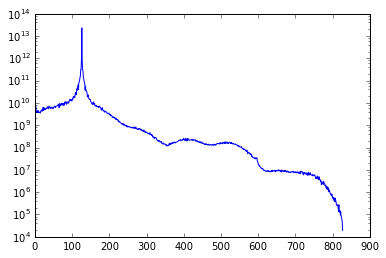

In [9]:
plt.semilogy(image_transforms[25]["power_spec"])

(array([[ 2.40824008,  2.40824008,  2.40824008, ...,  2.30749607,
          2.30749607,  2.30535126],
        [ 2.40824008,  2.40824008,  2.40824008, ...,  2.30749607,
          2.30749607,  2.30535126],
        [ 2.40824008,  2.40824008,  2.40824008, ...,  2.31175375,
          2.31175375,  2.32014632],
        ..., 
        [ 1.98227119,  1.98227119,  1.9777236 , ...,  2.06445789,
          2.06445789,  2.08278537],
        [ 1.98227119,  1.98227119,  1.9777236 , ...,  2.06445789,
          2.06445789,  2.08278537],
        [ 2.03342366,  2.03342366,  2.02118921, ...,  2.0413928 ,
          2.0413928 ,  2.10037065]], dtype=float32),
 array([[ 6.25873518,  6.05952024,  3.96375608, ...,  5.09133911,
          3.96375608,  6.05952024],
        [ 5.00106668,  5.64396858,  6.26419735, ...,  5.97452879,
          5.42283678,  6.22310448],
        [ 5.85526037,  6.61321211,  6.56080103, ...,  6.31683254,
          6.07898998,  5.77925873],
        ..., 
        [ 5.98878527,  5.92615128,  6

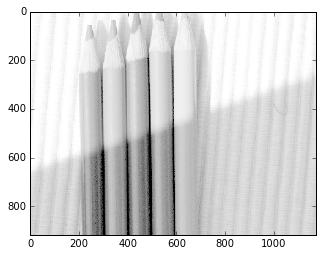

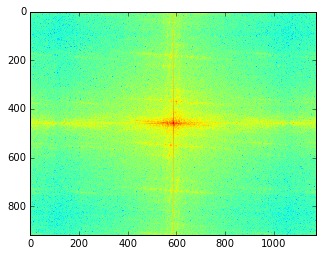

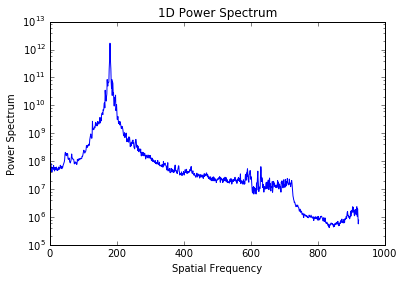

In [28]:
#show me dat natural scene!
#use this if you just want to look at a single image
img = natural_scenes[113,:,:]
plt.imshow(img,cmap= "gray")
fouri_trans(img,plot=True) 

In [21]:
x_fft_freq = np.arange(0,1174,1.)
x_fft_sf = x_fft_freq*(1./1174)*9.8

y_fft_freq = np.arange(918)
y_fft_sf = y_fft_freq*(1./918)*9.8

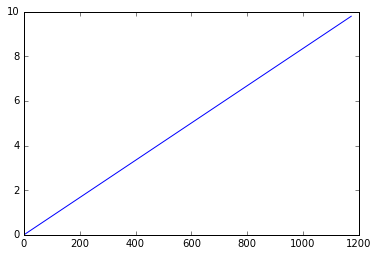

In [22]:
plt.plot(x_fft_sf)

In [45]:
FFTData = np.zeros([918, 1174], dtype=complex)
freq_comp_rows = np.fft.fftfreq(FFTData.shape[0],d=9.8)
freq_comp_cols = np.fft.fftfreq(FFTData.shape[1],d=9.8)

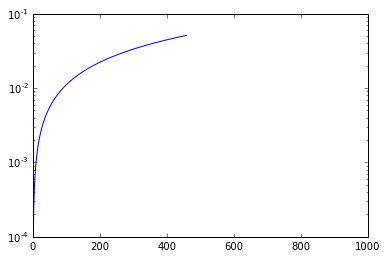

In [46]:
plt.semilogy(freq_comp_rows)